In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [77]:
df= pd.read_csv('Churn_Modelling.csv')

In [78]:
df.shape

(10000, 14)

In [79]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3800,3801,15685314,Noble,850,France,Female,28,2,0.00,2,1,1,38773.74,0
4237,4238,15736271,Dumetochukwu,498,France,Female,29,9,0.00,1,1,0,190035.83,0
9026,9027,15807593,Berry,546,Spain,Female,36,7,85660.96,1,0,0,134778.01,0
25,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0
2768,2769,15713379,Anderson,669,France,Male,26,4,0.00,2,1,1,197594.34,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [82]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [83]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
cat_cols=['Geography','Gender']
num_cols=[col for col in df.columns if col not in cat_cols]

In [86]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [87]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [88]:
df=pd.get_dummies(data=df, columns=['Geography'])

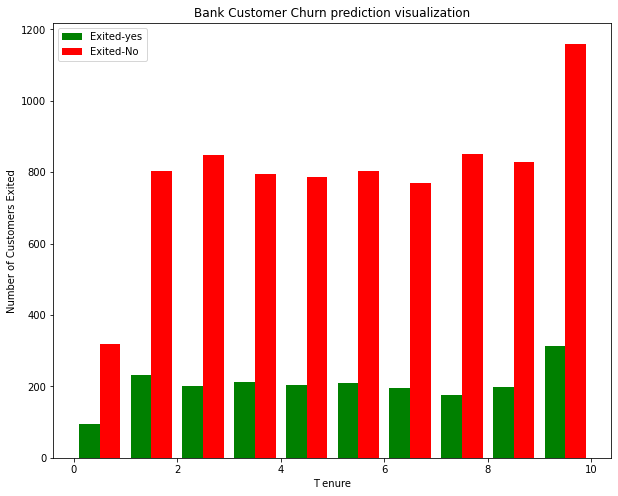

In [89]:
tenure_exited_0=df[df.Exited==0].Tenure
tenure_exited_1=df[df.Exited==1].Tenure

plt.figure(figsize=(10,8))
plt.xlabel('T enure')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([tenure_exited_1,tenure_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

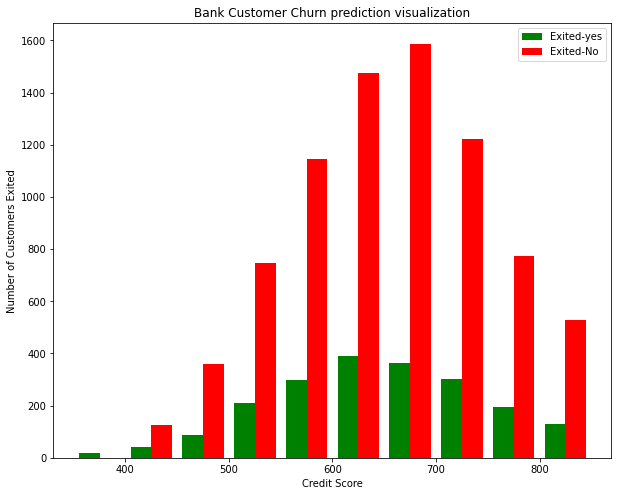

In [90]:
creditscore_exited_0=df[df.Exited==0].CreditScore
creditscore_exited_1=df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_exited_1,creditscore_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

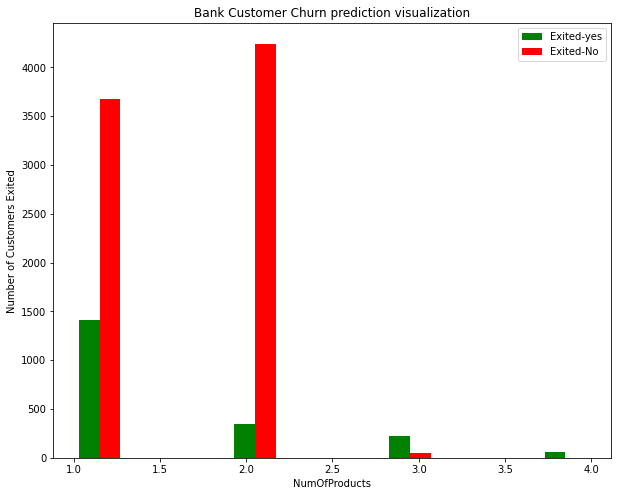

In [91]:
NumOfProducts_exited_0=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_1=df[df.Exited==1].NumOfProducts

plt.figure(figsize=(10,8))
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([NumOfProducts_exited_1,NumOfProducts_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

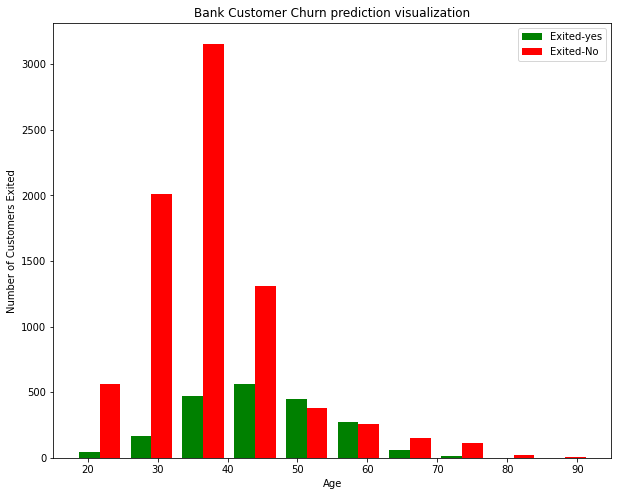

In [92]:
Age_exited_0=df[df.Exited==0].Age
Age_exited_1=df[df.Exited==1].Age

plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([Age_exited_1,Age_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [94]:
# Scaling
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [95]:
# Training
x=df.drop('Exited',axis=1)
y=df.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [96]:
def ANN(xtrain,xtest,ytrain,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred

In [97]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.7676
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7967
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7987
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.8025
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8072
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8107
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8127
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8125
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8159
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4188 - accura

235/235 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8597
Epoch 82/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8593
Epoch 83/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8600
Epoch 84/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8603
Epoch 85/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8601
Epoch 86/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8609
Epoch 87/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8596
Epoch 88/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8596
Epoch 89/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8593
Epoch 90/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 

Text(69.0, 0.5, 'Truth')

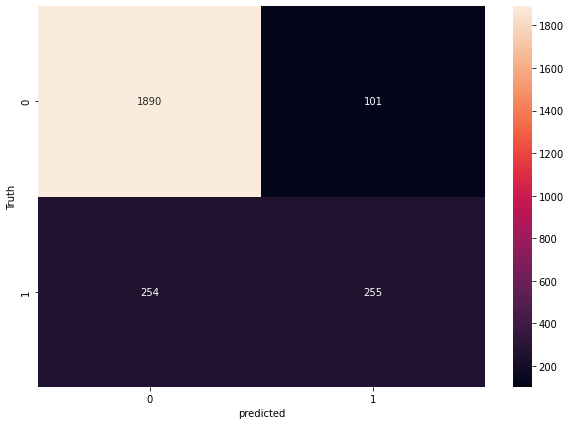

In [98]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

# Handling Imbalanced Data
## 1. Under Sampling majority class

In [99]:
count_class_0, count_class_1 = df.Exited.value_counts()

In [100]:
df_class_0= df[df.Exited==0]
df_class_1= df[df.Exited==1]

In [101]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1])

df_test_under.shape

(4074, 13)

In [102]:
# Training
x=df_test_under.drop('Exited',axis=1)
y=df_test_under.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [103]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5650
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6298
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6429
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.6602
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.6717
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6822
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.6851
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6900
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6992
Epoch 10/100
96/96 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.6998
Epoch 11/

96/96 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7758
Epoch 84/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7800
Epoch 85/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7755
Epoch 86/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7777
Epoch 87/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7781
Epoch 88/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7741
Epoch 89/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7777
Epoch 90/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7774
Epoch 91/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7784
Epoch 92/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7771
Epoch 93/100


## Over sampling

In [104]:
df_class_1_over= df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

df_test_over.shape

(15926, 13)

In [105]:
# Training
x=df_test_over.drop('Exited',axis=1)
y=df_test_over.Exited


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 1ms/step - loss: 0.6550 - accuracy: 0.6128
Epoch 2/100
374/374 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6699
Epoch 3/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5966 - accuracy: 0.6915
Epoch 4/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5842 - accuracy: 0.6964
Epoch 5/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7057
Epoch 6/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7191
Epoch 7/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7384
Epoch 8/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7497
Epoch 9/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7550
Epoch 10/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5095 - accura

374/374 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7854
Epoch 82/100
374/374 [==============================] - 1s 1ms/step - loss: 0.4551 - accuracy: 0.7834
Epoch 83/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7832
Epoch 84/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7864
Epoch 85/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7839
Epoch 86/100
374/374 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.7851
Epoch 87/100
374/374 [==============================] - 1s 1ms/step - loss: 0.4539 - accuracy: 0.7876
Epoch 88/100
374/374 [==============================] - 1s 1ms/step - loss: 0.4540 - accuracy: 0.7848
Epoch 89/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7852
Epoch 90/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 

## SMOTE

In [106]:
x=df.drop('Exited',axis=1)
y=df.Exited

from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_sample(x,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.25,random_state=15,stratify=y_sm)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 1ms/step - loss: 0.6633 - accuracy: 0.6052
Epoch 2/100
374/374 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6711
Epoch 3/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.6894
Epoch 4/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5809 - accuracy: 0.6992
Epoch 5/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.7040
Epoch 6/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.7101
Epoch 7/100
374/374 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.7158
Epoch 8/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7181
Epoch 9/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7235
Epoch 10/100
374/374 [==============================] - 0s 1ms/step - loss: 0.5404 - accura

374/374 [==============================] - 0s 966us/step - loss: 0.4303 - accuracy: 0.7938
Epoch 82/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7966
Epoch 83/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7950
Epoch 84/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7959
Epoch 85/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.7960
Epoch 86/100
374/374 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.7955
Epoch 87/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7971
Epoch 88/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7969
Epoch 89/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.7966
Epoch 90/100
374/374 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy